# Sprint 3: Time Series

In [1]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_excel("EVDS_Data.xlsx", parse_dates=['Tarih'], dayfirst=True, index_col='Tarih')

In [3]:
df

USD_Alis  EURO_Alis  GBP_Alis
Tarih                                    
2004-02-09  1.332801   1.672132  2.445506
2004-02-10  1.342133   1.709341  2.494961
2004-02-11  1.338843   1.709301  2.501692
2004-02-12  1.334726   1.691499  2.494668
2004-02-13  1.314923   1.685600  2.487623
...              ...        ...       ...
2020-04-03  6.667200   7.284900  8.272400
2020-04-04       NaN        NaN       NaN
2020-04-05       NaN        NaN       NaN
2020-04-06  6.690300   7.227900  8.222800
2020-04-07  6.754900   7.299000  8.294100

[5903 rows x 3 columns]

#### Veri 5903 kayıt ve 3 özellik içeriyor.

- **Tarih** - Verinin oluştuğu tarih
- **USD_Alis** - 1 USD'nin TL değeri (alış)
- **EURO_Alis** - 1 EURO'nun TL değeri (alış)
- **GBP_Alis** - 1 GBP'nin (İngiliz Sterlini) TL değeri (alış)

In [4]:
df.shape

(5903, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5903 entries, 2004-02-09 to 2020-04-07
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD_Alis   4072 non-null   float64
 1   EURO_Alis  4072 non-null   float64
 2   GBP_Alis   4072 non-null   float64
dtypes: float64(3)
memory usage: 184.5 KB


In [6]:
df.head()

USD_Alis  EURO_Alis  GBP_Alis
Tarih                                    
2004-02-09  1.332801   1.672132  2.445506
2004-02-10  1.342133   1.709341  2.494961
2004-02-11  1.338843   1.709301  2.501692
2004-02-12  1.334726   1.691499  2.494668
2004-02-13  1.314923   1.685600  2.487623

In [7]:
df.describe()

USD_Alis    EURO_Alis     GBP_Alis
count  4072.000000  4072.000000  4072.000000
mean      2.396409     2.919642     3.577465
std       1.392120     1.462929     1.559653
min       1.144900     1.549500     2.110500
25%       1.452624     1.893075     2.466975
50%       1.780800     2.324850     2.821700
75%       2.934475     3.285800     4.230650
max       6.879800     7.832700     8.758000

In [8]:
df.corr()

USD_Alis  EURO_Alis  GBP_Alis
USD_Alis   1.000000   0.993292  0.990837
EURO_Alis  0.993292   1.000000  0.987660
GBP_Alis   0.990837   0.987660  1.000000

#### Veri içerisinde haftasonları ve tatil günleri boştur.

In [9]:
df.isnull().sum()

USD_Alis     1831
EURO_Alis    1831
GBP_Alis     1831
dtype: int64

#### Boş verilerin doldurulması: pandas interpolate

In [10]:
df = df.apply(lambda x: x.interpolate(limit_direction='both'), axis=0)
df.isnull().sum()

USD_Alis     0
EURO_Alis    0
GBP_Alis     0
dtype: int64

### Veri Görselleştirme

In [11]:
trace0 = go.Scatter(x=df.index, y=df.USD_Alis, name='USD Alış')
trace1 = go.Scatter(x=df.index, y=df.EURO_Alis, name='EURO Alış')
trace2 = go.Scatter(x=df.index, y=df.GBP_Alis, name='GBP Alış')
data = [trace0, trace1, trace2]

fig = go.Figure(data=data)
fig.update_layout(
    title="Tarihe Göre USD-EURO-GBP Değerleri"
)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

#### Grafik çizimleri için oluşturduğum fonksiyon:

In [12]:
def plot_data(df, title):
    trace0 = go.Scatter(x=df.index, y=df.USD_Alis, name='USD Alış')
    trace1 = go.Scatter(x=df.index, y=df.EURO_Alis, name='EURO Alış')
    trace2 = go.Scatter(x=df.index, y=df.GBP_Alis, name='GBP Alış')
    data = [trace0, trace1, trace2]
    fig=go.Figure(data=data)
    fig.update_layout(title=title)
    fig.show()

#### Her geçen hafta için ortalama değer

In [13]:
weekly_data = df.resample('W').mean()
weekly_data

USD_Alis  EURO_Alis  GBP_Alis
Tarih                                    
2004-02-15  1.327076   1.690705  2.484661
2004-02-22  1.317493   1.681961  2.493879
2004-02-29  1.321414   1.656623  2.468779
2004-03-07  1.320847   1.623256  2.432169
2004-03-14  1.316155   1.616441  2.392808
...              ...        ...       ...
2020-03-15  6.168729   6.969143  7.933900
2020-03-22  6.436086   7.064486  7.699557
2020-03-29  6.473371   7.029471  7.665814
2020-04-05  6.598243   7.226943  8.137629
2020-04-12  6.722600   7.263450  8.258450

[844 rows x 3 columns]

In [14]:
title = 'Her Hafta İçin Ortalama Değer'
plot_data(weekly_data, title)

#### Her geçen ay için ortamala değer

In [15]:
monthly_data = df.resample('M').mean()
monthly_data

USD_Alis  EURO_Alis  GBP_Alis
Tarih                                    
2004-02-29  1.321995   1.676430  2.482440
2004-03-31  1.316544   1.614440  2.401792
2004-04-30  1.350352   1.622800  2.440444
2004-05-31  1.500181   1.800242  2.676199
2004-06-30  1.489325   1.806731  2.722231
...              ...        ...       ...
2019-12-31  5.836602   6.480860  7.631301
2020-01-31  5.915200   6.575369  7.724639
2020-02-29  6.043055   6.594293  7.828394
2020-03-31  6.311868   6.981013  7.811418
2020-04-30  6.668900   7.258700  8.224871

[195 rows x 3 columns]

In [16]:
title = 'Her Ay İçin Ortalama Değer'
plot_data(monthly_data, title)

#### rule='Q' ile 3 ayda bir ortalama değer

In [17]:
quarterly = df.resample(rule='Q').mean()
quarterly

USD_Alis  EURO_Alis  GBP_Alis
Tarih                                    
2004-03-31  1.318745   1.639474  2.434361
2004-06-30  1.447208   1.743884  2.613653
2004-09-30  1.471444   1.797632  2.673691
2004-12-31  1.441433   1.864280  2.683443
2005-03-31  1.320931   1.735058  2.496929
...              ...        ...       ...
2019-06-30  5.873781   6.594670  7.536004
2019-09-30  5.662653   6.300191  6.971753
2019-12-31  5.783582   6.403293  7.427300
2020-03-31  6.091074   6.719586  7.787266
2020-06-30  6.668900   7.258700  8.224871

[66 rows x 3 columns]

In [18]:
title = 'Her 3 Ayda Bir Ortalama Değer'
plot_data(quarterly, title)

#### rule='A' ile her yıl sonu ortalama değer

In [19]:
years = df.resample(rule='A').mean()
years

USD_Alis  EURO_Alis  GBP_Alis
Tarih                                    
2004-12-31  1.431974   1.776275  2.621668
2005-12-31  1.340731   1.670435  2.440001
2006-12-31  1.429575   1.797715  2.635947
2007-12-31  1.300425   1.777410  2.599097
2008-12-31  1.297304   1.897102  2.382239
2009-12-31  1.545851   2.150905  2.412429
2010-12-31  1.499020   1.988418  2.315084
2011-12-31  1.670840   2.324490  2.676106
2012-12-31  1.792281   2.304062  2.838402
2013-12-31  1.902913   2.528383  2.974577
2014-12-31  2.186396   2.904406  3.595174
2015-12-31  2.718900   3.018696  4.152896
2016-12-31  3.017030   3.337097  4.077694
2017-12-31  3.644146   4.115220  4.686459
2018-12-31  4.829646   5.678476  6.403350
2019-12-31  5.671641   6.348573  7.225709
2020-12-31  6.132347   6.758094  7.818523

In [20]:
title = 'Her Yıl Sonu Ortalama Değer'
plot_data(years, title)

#### Veri setinin mevsimsellik durumu:
 - **seasonal_decompose** Python'da zaman serisi mevsimsel ayrışmanın nasıl yapılacağını gösterir.
 - Grafik, verilerimizin yıllık mevsimsellik ile birlikte artış eğilimini göstermemektedir. Mevsimsellik yoktur.

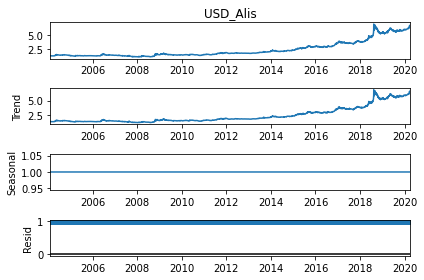

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(df.USD_Alis, model='multiplicative',period=1)
result.plot()
pyplot.show()

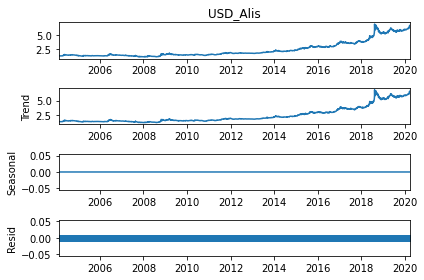

In [22]:
result2 = seasonal_decompose(df.USD_Alis, model='additive',period=1)
result2.plot()
pyplot.show()

#### pandas.DataFrame.pct_change
- Geçerli ve önceki öğe arasındaki yüzde değişimi.
- Varsayılan olarak hemen önceki satırdaki yüzde değişikliğini hesaplar. Bu, zaman serisindeki elemanların değişim yüzdesinin karşılaştırılmasında faydalıdır.

In [11]:
dr = df.copy()
dr['DailyReturn'] = dr['USD_Alis'].pct_change()

In [12]:
trace = go.Scatter(x=dr.index, y=dr['DailyReturn'], name='USD_Alis')
fig = go.Figure(data=trace)
fig.update_layout(
    title=" USD Alış için Mevcut Günün Bir Önceki Güne Göre Yüzde Değişimi"
)
fig.show()

#### diff()

Text(0.5, 1.0, 'USD Alış için Günlük Fark Değerleri')

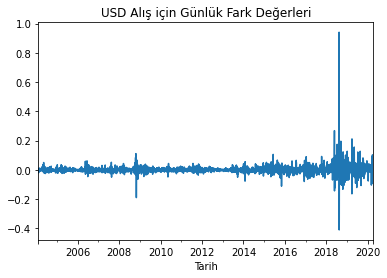

In [13]:
df['USD_Alis'].diff().plot()
plt.title('USD Alış için Günlük Fark Değerleri')

#### rolling()

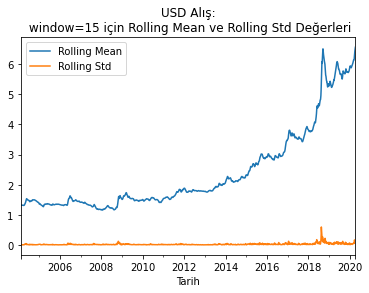

In [14]:
df['USD_Alis'].rolling(window=15).mean().plot()
df['USD_Alis'].rolling(window=15).std().plot()
plt.title('USD Alış:\n window=15 için Rolling Mean ve Rolling Std Değerleri')
plt.legend(['Rolling Mean','Rolling Std'])

#### Dickey-Fuller Test:
- p-value değerine baktığımzda verinin durağan olmadığı ve ARIMA için uygun olmadığı sonucuna varırız.

In [15]:
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test:')
result = adfuller(df['USD_Alis'], autolag='AIC')
print('p-value: %s' %result[1])

Result of Dickey-Fuller Test:
p-value: 0.9980540369940969


#### log(exp(x))

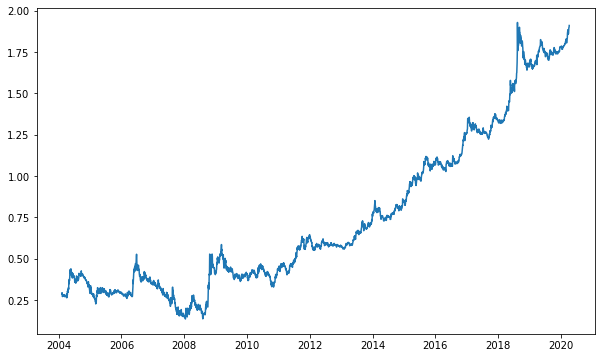

In [62]:
ts_log = np.log(df['USD_Alis'])
plt.figure(figsize=(10,6))
plt.plot(ts_log)

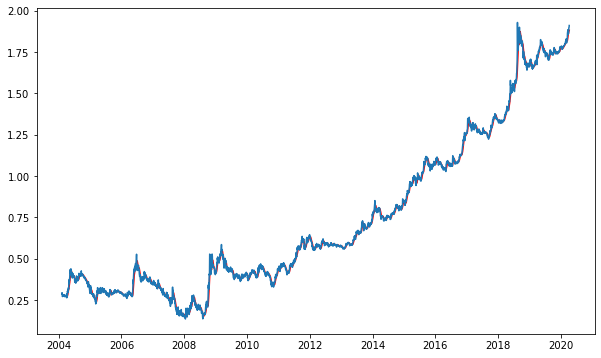

In [63]:
ts_smooth = ts_log.rolling(window =15).mean()
plt.figure(figsize=(10,6))
plt.plot(ts_smooth, color = 'red')
plt.plot(ts_log)
plt.show()

In [64]:
no_sub_ts = ts_smooth
no_sub_ts.dropna(inplace = True)
result = adfuller(no_sub_ts, autolag='AIC')
print('p-value: %s' %result[1])

p-value: 0.993058689947677


In [65]:
sub_ts = ts_log - ts_smooth
sub_ts.dropna(inplace = True)
result = adfuller(sub_ts, autolag='AIC')
print('p-value: %s' %result[1])

p-value: 2.004165564303512e-18


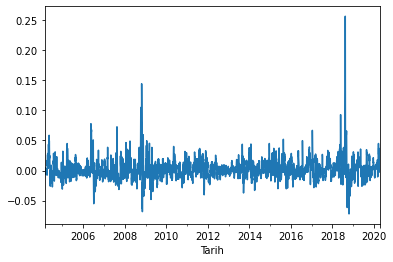

In [66]:
sub_ts.plot()

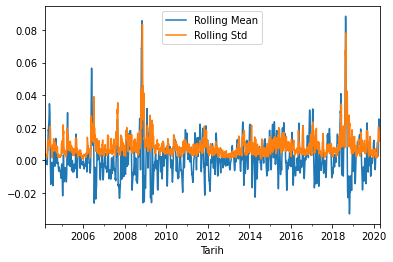

In [67]:
sub_ts.rolling(window=15).mean().plot()
sub_ts.rolling(window=15).std().plot()
plt.legend(['Rolling Mean','Rolling Std'])

#### Diferansiyel ve Üstel Ağırlık

In [68]:
expwighted_avg = ts_log.ewm(halflife=15).mean()

ts_diff = ts_log - ts_log.shift()
ts_diff.dropna(inplace = True)

ts_diff_exp = ts_diff  - ts_diff.ewm(halflife = 15).mean()
ts_diff_exp.dropna(inplace = True)

result = adfuller(ts_diff_exp, autolag='AIC')
print('p-value: %s' %result[1])

p-value: 1.9605897760582837e-28


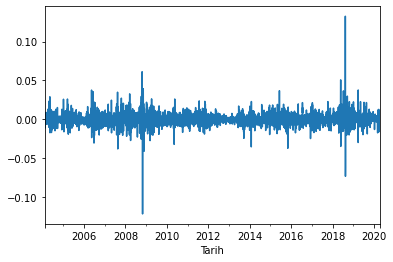

In [74]:
ts_diff_exp.plot()

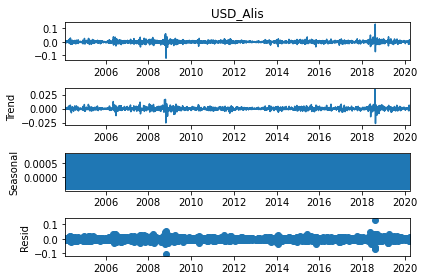

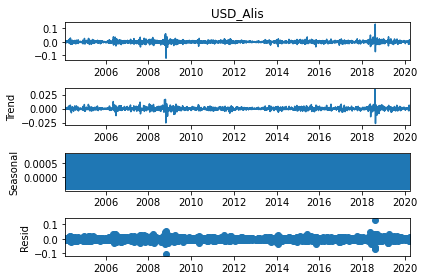

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
seasonal_decompose(ts_diff_exp).plot()

## ARIMA
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

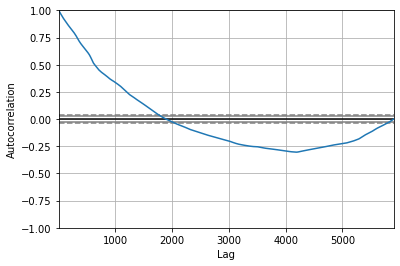

In [171]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df[['USD_Alis']])

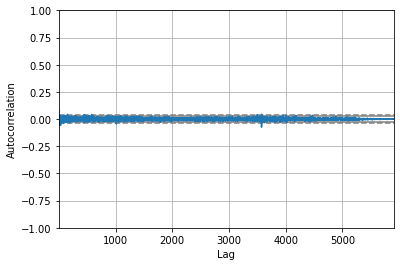

In [75]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts_diff_exp)

In [80]:
from statsmodels.tsa.arima_model import ARIMA
input_series = np.asarray(ts_diff_exp)
model_arima = ARIMA(input_series, order=(0,0,1))
model_fit = model_arima.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5901
Model:                 ARIMA(0, 1, 1)   Log Likelihood               21163.408
Method:                       css-mle   S.D. of innovations              0.007
Date:                Wed, 29 Apr 2020   AIC                         -42320.817
Time:                        15:06:46   BIC                         -42300.768
Sample:                             1   HQIC                        -42313.849
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.853e-09   5.13e-08      0.134      0.894   -9.37e-08    1.07e-07
ma.L1.D.y     -1.0000      0.000  -2371.255      0.000      -1.001      -0.999
                                    Roots           

#### Feature Engineering

In [29]:
data = dff.copy()
data['lag_1'] = data['USD_Alis'].shift(1)
data = data[['USD_Alis', 'lag_1']]
data.head()

NameError: name 'dff' is not defined

In [206]:
data['lag_2'] = data['USD_Alis'].shift(2)
data['lag_3'] = data['USD_Alis'].shift(3)
data['lag_4'] = data['USD_Alis'].shift(4)
data['lag_5'] = data['USD_Alis'].shift(5)
data['lag_6'] = data['USD_Alis'].shift(6)
data['lag_7'] = data['USD_Alis'].shift(7)

data = data[['USD_Alis', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']]
data.head(10)

USD_Alis     lag_1     lag_2     lag_3     lag_4     lag_5  \
Tarih                                                                    
2004-02-09  1.332801       NaN       NaN       NaN       NaN       NaN   
2004-02-10  1.342133  1.332801       NaN       NaN       NaN       NaN   
2004-02-11  1.338843  1.342133  1.332801       NaN       NaN       NaN   
2004-02-12  1.334726  1.338843  1.342133  1.332801       NaN       NaN   
2004-02-13  1.314923  1.334726  1.338843  1.342133  1.332801       NaN   
2004-02-14  1.313677  1.314923  1.334726  1.338843  1.342133  1.332801   
2004-02-15  1.312431  1.313677  1.314923  1.334726  1.338843  1.342133   
2004-02-16  1.311185  1.312431  1.313677  1.314923  1.334726  1.338843   
2004-02-17  1.316762  1.311185  1.312431  1.313677  1.314923  1.334726   
2004-02-18  1.313915  1.316762  1.311185  1.312431  1.313677  1.314923   

               lag_6     lag_7  
Tarih                           
2004-02-09       NaN       NaN  
2004-02-10       NaN       NaN  
2004-02-11       NaN       NaN  
2004-02-12       NaN       NaN  
2004-02-13       NaN       NaN  
2004-02-14       NaN       NaN  
2004-02-15  1.332801       NaN  
2004-02-16  1.342133  1.332801  
2004-02-17  1.338843  1.342133  
2004-02-18  1.334726  1.338843

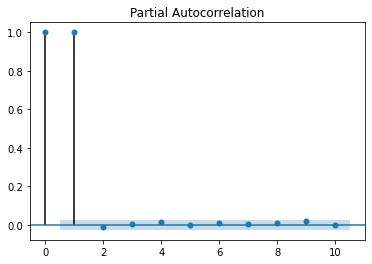

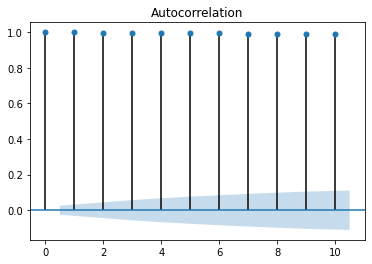

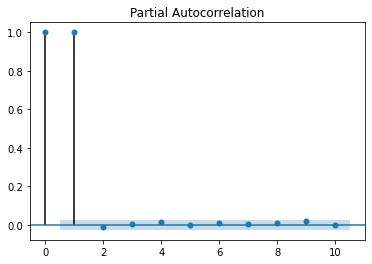

In [212]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['USD_Alis'], lags=10)
plot_pacf(data['USD_Alis'], lags=10)

#### TRAIN / TEST DATA

In [30]:
training_data_len = int(np.ceil( len(df) * .90 ))
training_data_len

5313

In [31]:
train, test = df[:training_data_len], df[training_data_len:]

In [32]:
test.shape

(590, 3)

## Facebook'un Zaman Serisi Modeli: PROPHET

In [32]:
from fbprophet import Prophet

In [33]:
y=list(train.iloc[:,0])
df_prophett= pd.DataFrame()
df_prophett['ds'] = pd.to_datetime(train.index, format='%d-%m-%Y')
df_prophett['y']= y
df_prophett

ds         y
0    2004-02-09  1.332801
1    2004-02-10  1.342133
2    2004-02-11  1.338843
3    2004-02-12  1.334726
4    2004-02-13  1.314923
...         ...       ...
5308 2018-08-22  5.994400
5309 2018-08-23  5.994400
5310 2018-08-24  5.994400
5311 2018-08-25  5.994400
5312 2018-08-26  5.994400

[5313 rows x 2 columns]

#### Fit:
- Prophet örneği oluşturup, modeli df_prophet verisi için eğitiyoruz.

In [156]:
m = Prophet()
m.fit(df_prophett)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Prophet.make_future_dataframe:
- Prophet.make_future_dataframe ile belirli bir sayıda geleceğe dair veri seti elde edebilirsiniz.
- Varsayılan olarak geçmişten tarihleri de içerecektir.

#### Predicting:
- **yhat** : her bir satır için tahmin edilen değer
- **yhat_lower**, **yhat_upper** : belirsizlik aralığı

In [157]:
future = m.make_future_dataframe(periods=1180)
forecast = m.predict(futuree)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
6488 2021-11-14  6.329788    4.937957    7.728177
6489 2021-11-15  6.330099    4.945489    7.738665
6490 2021-11-16  6.334756    4.976901    7.734638
6491 2021-11-17  6.337974    4.969168    7.781670
6492 2021-11-18  6.340720    4.980829    7.799670

In [636]:
forecast.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2004-02-09  1.379454    1.180737    1.574560     1.379454     1.379454   
1 2004-02-10  1.379845    1.213353    1.579282     1.379845     1.379845   
2 2004-02-11  1.380235    1.187360    1.563529     1.380235     1.380235   
3 2004-02-12  1.380626    1.176362    1.559914     1.380626     1.380626   
4 2004-02-13  1.381017    1.184056    1.557261     1.381017     1.381017   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -0.005829             -0.005829             -0.005829 -0.002136   
1       -0.005375             -0.005375             -0.005375  0.000103   
2       -0.006296             -0.006296             -0.006296  0.000899   
3       -0.007605             -0.007605             -0.007605  0.001218   
4       -0.010364             -0.010364             -0.010364 -0.000022   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.002136     -0.002136 -0.003693     -0.003693     -0.003693   
1      0.000103      0.000103 -0.005478     -0.005478     -0.005478   
2      0.000899      0.000899 -0.007195     -0.007195     -0.007195   
3      0.001218      0.001218 -0.008823     -0.008823     -0.008823   
4     -0.000022     -0.000022 -0.010342     -0.010342     -0.010342   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  1.373626  
1                         0.0  1.374470  
2                         0.0  1.373939  
3                         0.0  1.373021  
4                         0.0  1.370652

#### Prophet.plot
- **Prophet.plot** yöntemi ile ve elde edilen tahminleri içerin forecast dataframe'ini ileterek çizilebilir.

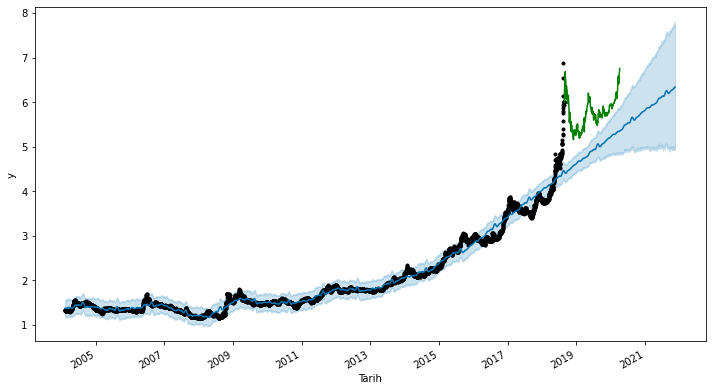

In [159]:
fig1 = m.plot(forecast)
test.iloc[:,0].plot(color='g')

#### Prophet.plot_components:
- Tahmin bileşenlerini **Prophet.plot_components** yöntemi ile görebilirsiniz . Varsayılan olarak zaman serisinin trendini, yıllık mevsimselliğini ve haftalık mevsimselliğini görürsünüz.

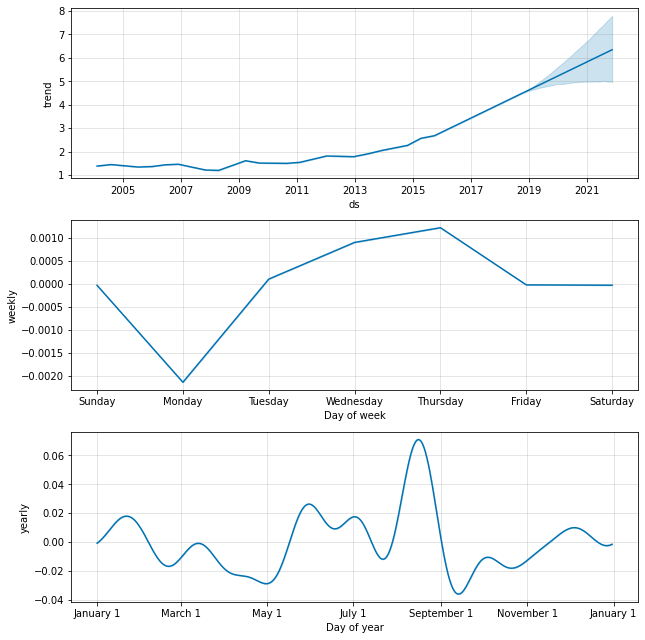

In [160]:
fig2 = m.plot_components(forecast)

#### from fbprophet.plot import plot_plotly
- fbprophet in bu modulü ile tahminin plotly çizimi gerçekleştirilir.

In [161]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)
py.iplot(fig)

#### ChangePoints :
- Zaman serilerinin yörüngede ani değişikliklere sahip olduğu tarih saat noktalarıdır.
- Varsayılan olarak, Prophet, veri kümesinin ilk %80'ine 25 Change Points ekler.
- Potansiyel değişiklik noktalarının meydana geldiği dikey çizgiler bu şekilde çizilir:

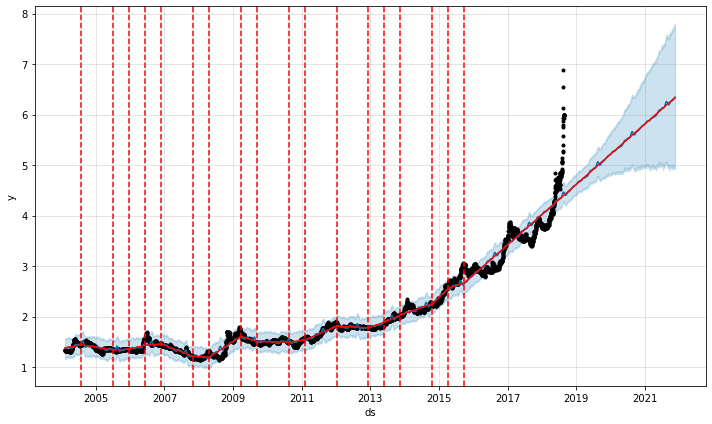

In [162]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

 - Chagepoint'lerin gerçekleştiği tarihler:

In [129]:
m.changepoints

170    2004-07-28
340    2005-01-14
510    2005-07-03
680    2005-12-20
850    2006-06-08
1020   2006-11-25
1190   2007-05-14
1360   2007-10-31
1530   2008-04-18
1700   2008-10-05
1870   2009-03-24
2040   2009-09-10
2209   2010-02-26
2379   2010-08-15
2549   2011-02-01
2719   2011-07-21
2889   2012-01-07
3059   2012-06-25
3229   2012-12-12
3399   2013-05-31
3569   2013-11-17
3739   2014-05-06
3909   2014-10-23
4079   2015-04-11
4249   2015-09-28
Name: ds, dtype: datetime64[ns]

- Değişim noktalarının büyüklüğü:

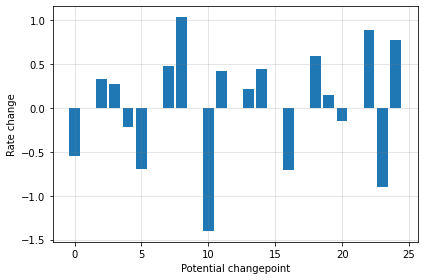

In [134]:
deltas = m.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

- **changepoint_range** : changepoint aralığı değiştirebilir.
- **n_changepoints** Değişim noktası sayısı değiştirilebilir.
- Prophet, bir overfit / underfit olması durumunda eğilimi ayarlamanıza izin verir. 
- **changepoint_prior_scale** , trendin gücünü ayarlamaya yardımcı olur. Varsayılan değer 0,05'tir. Eğilimi daha az esnek hale getirmek için değer azaltılır, trendi daha esnek hale getirmek için changepoint_prior_scale değeri arttırılır.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


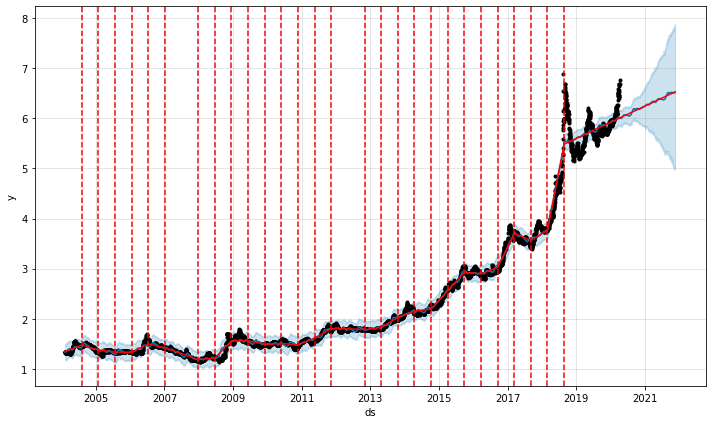

In [135]:
pro_change= Prophet(changepoint_range=0.9, n_changepoints=30, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df_prophet).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

#### mean_squared_error, mean_absolute_error

In [163]:
forecast['yhat'].iloc[training_data_len:training_data_len+len(test)]

5313    4.441448
5314    4.439329
5315    4.435654
5316    4.431476
5317    4.425799
          ...   
5898    5.346379
5899    5.347374
5900    5.348474
5901    5.347568
5902    5.351090
Name: yhat, Length: 590, dtype: float64

In [164]:
test['USD_Alis']

Tarih
2018-08-27    5.99440
2018-08-28    6.19010
2018-08-29    6.21860
2018-08-30    6.31245
2018-08-31    6.40630
               ...   
2020-04-03    6.66720
2020-04-04    6.67490
2020-04-05    6.68260
2020-04-06    6.69030
2020-04-07    6.75490
Name: USD_Alis, Length: 590, dtype: float64

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true = test['USD_Alis'],
                   y_pred = forecast['yhat'].iloc[training_data_len:training_data_len+len(test)])

0.885162258902454

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true = test['USD_Alis'],
                   y_pred = forecast['yhat'].iloc[training_data_len:training_data_len+len(test)])

0.885162258902454

In [167]:
mean_absolute_error(y_true = test['USD_Alis'],
                   y_pred = forecast['yhat'].iloc[training_data_len:training_data_len+len(test)])

0.8726972608529888

In [168]:
mean_absolute_error(y_true = test['USD_Alis'],
                   y_pred = forecast['yhat'].iloc[training_data_len:training_data_len+len(test)])

0.8726972608529888

In [169]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=test['USD_Alis'],
                   y_pred=forecast['yhat'].iloc[training_data_len:training_data_len+len(test)])

14.97246105386631

## LSTM

In [312]:
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

#### Scaling / Train-Test Split

In [139]:
training_data_len = int(np.ceil( len(df) * .8 ))
training_data_len

4723

In [225]:
dff = df.filter(items=['USD_Alis'])

In [226]:
scaler = MinMaxScaler()
dff = scaler.fit_transform(dff)
train, test = dff[:training_data_len], dff[training_data_len:]

### Model

In [227]:
n_input = 5 #lookback
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=32)

#### scaling(0,1) için default değerler ile oluşturulan model;

In [215]:
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape = (n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [216]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 5, 200)            161600    
_________________________________________________________________
dropout_40 (Dropout)         (None, 5, 200)            0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 50)                50200     
_________________________________________________________________
dropout_41 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 211,851
Trainable params: 211,851
Non-trainable params: 0
_________________________________________________________________


In [217]:
history = model.fit_generator(generator, epochs=5)

Epoch 1/5
148/148 [==============================] - 9s 62ms/step - loss: 0.0018
Epoch 2/5
148/148 [==============================] - 8s 57ms/step - loss: 2.2004e-04
Epoch 3/5
148/148 [==============================] - 9s 58ms/step - loss: 1.7753e-04
Epoch 4/5
148/148 [==============================] - 8s 56ms/step - loss: 1.8147e-04
Epoch 5/5
148/148 [==============================] - 8s 57ms/step - loss: 1.6691e-04


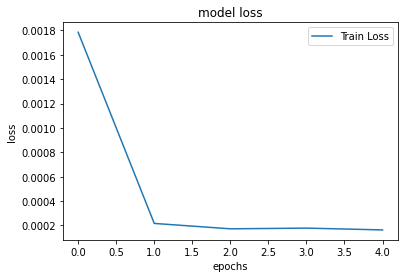

In [218]:
plt.plot(history.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [219]:
pred_list = []

batch = test[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [220]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

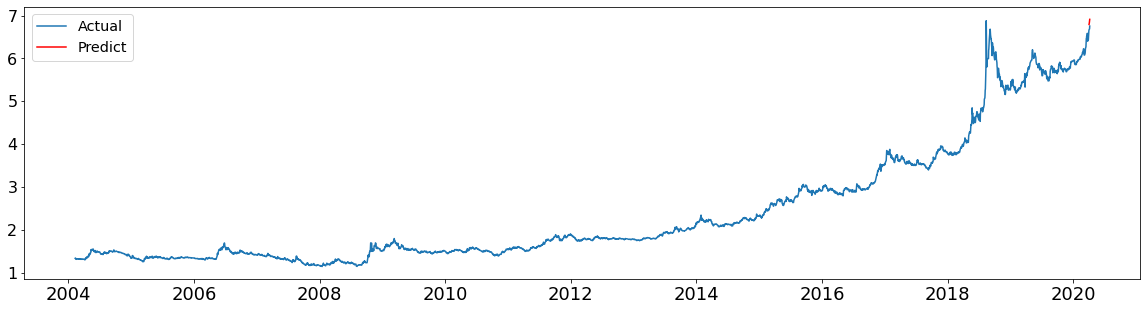

In [221]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['USD_Alis'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(['Actual','Predict'],loc='best', fontsize='x-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [222]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [0.5717215]


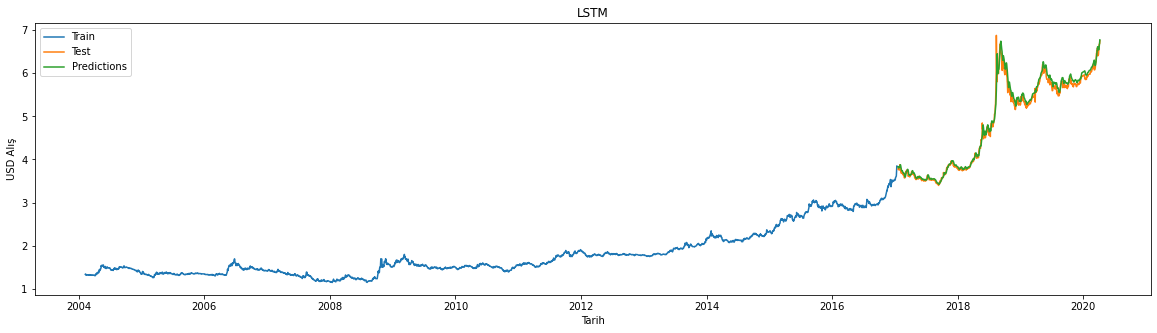

In [223]:
test_data_gen = TimeseriesGenerator(test, test,length=n_input, batch_size=16)
predictions = model.predict(test_data_gen)
predictions = scaler.inverse_transform(predictions)
dataset = df.filter(items=['USD_Alis'])
trainset = dataset[:training_data_len]
validset = dataset[training_data_len+n_input:]
validset['Predictions'] = predictions
plt.figure(figsize=(20, 5))
plt.title('LSTM')
plt.xlabel('Tarih')
plt.ylabel('USD Alış')
plt.plot(trainset['USD_Alis'])
plt.plot(validset[['USD_Alis','Predictions']])
plt.legend(['Train','Test','Predictions'])
plt.show()

In [224]:
pred_actual_rmse = rmse(dataset[training_data_len+n_input:], predictions)
print("rmse: ", pred_actual_rmse)

rmse:  [0.10391428]


- **scaling(0,1)** ile oluşturan veri seti üzerinde, **activation='sigmoid'** , **lr=0.001** olarak denendiği model;

In [233]:
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape = (n_input, n_features), activation='sigmoid'))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
from tensorflow.keras import optimizers
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse')
history = model.fit_generator(generator, epochs=5)

Epoch 1/5
148/148 [==============================] - 9s 59ms/step - loss: 0.0136
Epoch 2/5
148/148 [==============================] - 9s 58ms/step - loss: 0.0115
Epoch 3/5
148/148 [==============================] - 8s 56ms/step - loss: 0.0105
Epoch 4/5
148/148 [==============================] - 9s 58ms/step - loss: 0.0104
Epoch 5/5
148/148 [==============================] - 8s 57ms/step - loss: 0.0109


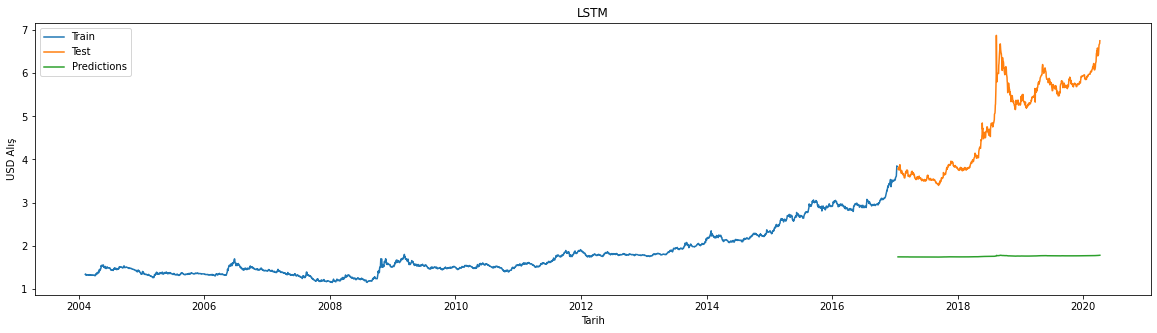

In [234]:
test_data_gen = TimeseriesGenerator(test, test,length=n_input, batch_size=16)
predictions = model.predict(test_data_gen)
predictions = scaler.inverse_transform(predictions)
dataset = df.filter(items=['USD_Alis'])
trainset = dataset[:training_data_len]
validset = dataset[training_data_len+n_input:]
validset['Predictions'] = predictions
plt.figure(figsize=(20, 5))
plt.title('LSTM')
plt.xlabel('Tarih')
plt.ylabel('USD Alış')
plt.plot(trainset['USD_Alis'])
plt.plot(validset[['USD_Alis','Predictions']])
plt.legend(['Train','Test','Predictions'])
plt.show()

In [235]:
pred_actual_rmse = rmse(dataset[training_data_len+n_input:], predictions)
print("rmse: ", pred_actual_rmse)

rmse:  [3.2565942]


- **scaling(0,1)** ile oluşturan veri seti üzerinde, **activation='sigmoid'** ve  **lr=0.003** olarak denendiği model;

In [236]:
adam = optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse')
history = model.fit_generator(generator, epochs=5)

Epoch 1/5
148/148 [==============================] - 9s 59ms/step - loss: 0.0105
Epoch 2/5
148/148 [==============================] - 10s 67ms/step - loss: 0.0107
Epoch 3/5
148/148 [==============================] - 9s 62ms/step - loss: 0.0104
Epoch 4/5
148/148 [==============================] - 9s 63ms/step - loss: 0.0104
Epoch 5/5
148/148 [==============================] - 9s 63ms/step - loss: 0.0100


In [237]:
test_data_gen = TimeseriesGenerator(test, test,length=n_input, batch_size=16)
predictions = model.predict(test_data_gen)
predictions = scaler.inverse_transform(predictions)
pred_actual_rmse = rmse(dataset[training_data_len+n_input:], predictions)
print("rmse: ", pred_actual_rmse)

rmse:  [3.24634895]


#### scaling (-1,1)
- öncelikle default degerler ile modeli eğittim.

In [251]:
#Veri -1,1 arası ölçeklendirilir:
scaler = MinMaxScaler(feature_range=(-1, 1))
dff = scaler.fit_transform(df.filter(items=['USD_Alis']))
train, test = dff[:training_data_len], dff[training_data_len:]

In [240]:
n_input = 5 #lookback
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape = (n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit_generator(generator, epochs=5)

Epoch 1/5
148/148 [==============================] - 10s 69ms/step - loss: 0.0247
Epoch 2/5
148/148 [==============================] - 9s 64ms/step - loss: 0.0045
Epoch 3/5
148/148 [==============================] - 10s 65ms/step - loss: 0.0041
Epoch 4/5
148/148 [==============================] - 9s 63ms/step - loss: 0.0038
Epoch 5/5
148/148 [==============================] - 10s 66ms/step - loss: 0.0036


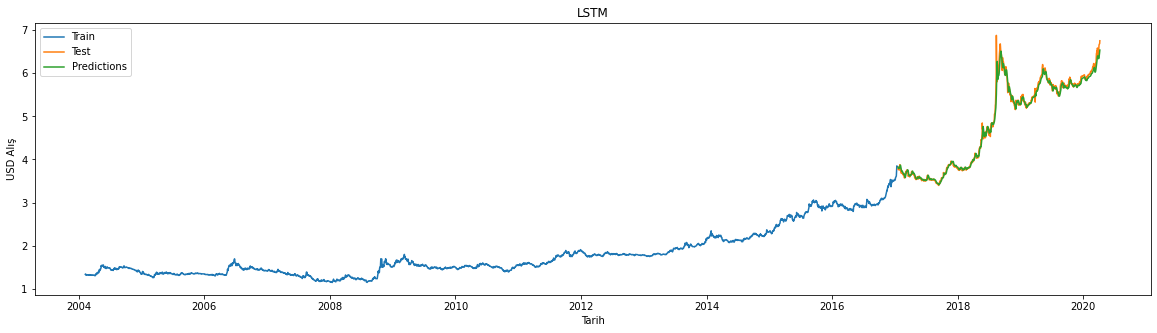

In [242]:
test_data_gen = TimeseriesGenerator(test, test,length=n_input, batch_size=16)
predictions = model.predict(test_data_gen)
predictions = scaler.inverse_transform(predictions)
dataset = df.filter(items=['USD_Alis'])
trainset = dataset[:training_data_len]
validset = dataset[training_data_len+n_input:]
validset['Predictions'] = predictions
plt.figure(figsize=(20, 5))
plt.title('LSTM')
plt.xlabel('Tarih')
plt.ylabel('USD Alış')
plt.plot(trainset['USD_Alis'])
plt.plot(validset[['USD_Alis','Predictions']])
plt.legend(['Train','Test','Predictions'])
plt.show()

In [241]:
test_data_gen = TimeseriesGenerator(test, test,length=n_input, batch_size=16)
predictions = model.predict(test_data_gen)
predictions = scaler.inverse_transform(predictions)
pred_actual_rmse = rmse(dataset[training_data_len+n_input:], predictions)
print("rmse: ", pred_actual_rmse)

rmse:  [0.09141771]


- **scaling(-1,1)** ile oluşturan veri seti üzerinde, **activation='tanh'** ve **lr=0.001** olarak denendiği model;

In [259]:
n_input = 5 #lookback
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape = (n_input, n_features), activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))
from tensorflow.keras import optimizers
adam = optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse')
history = model.fit_generator(generator, epochs=5)

Epoch 1/5
148/148 [==============================] - 9s 63ms/step - loss: 0.0315
Epoch 2/5
148/148 [==============================] - 9s 63ms/step - loss: 0.0028
Epoch 3/5
148/148 [==============================] - 9s 63ms/step - loss: 0.0021
Epoch 4/5
148/148 [==============================] - 9s 63ms/step - loss: 0.0019: 0s - loss: 
Epoch 5/5
148/148 [==============================] - 11s 75ms/step - loss: 0.0020


In [260]:
test_data_gen = TimeseriesGenerator(test, test,length=n_input, batch_size=16)
predictions = model.predict(test_data_gen)
predictions = scaler.inverse_transform(predictions)
pred_actual_rmse = rmse(dataset[training_data_len+n_input:], predictions)
print("rmse: ", pred_actual_rmse)

rmse:  [0.65705854]


- **scaling(-1,1)** ile oluşturan veri seti üzerinde, **activation='tanh'** ve **lr=0.003** olarak denendiği model;

In [257]:
from tensorflow.keras import optimizers
adam = optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse')
history = model.fit_generator(generator, epochs=5)

Epoch 1/5
148/148 [==============================] - 9s 62ms/step - loss: 0.0024
Epoch 2/5
148/148 [==============================] - 9s 58ms/step - loss: 0.0016
Epoch 3/5
148/148 [==============================] - 9s 58ms/step - loss: 0.0022
Epoch 4/5
148/148 [==============================] - 9s 57ms/step - loss: 0.0018
Epoch 5/5
148/148 [==============================] - 9s 60ms/step - loss: 0.0011


In [258]:
test_data_gen = TimeseriesGenerator(test, test,length=n_input, batch_size=16)
predictions = model.predict(test_data_gen)
predictions = scaler.inverse_transform(predictions)
pred_actual_rmse = rmse(dataset[training_data_len+n_input:], predictions)
print("rmse: ", pred_actual_rmse)

rmse:  [1.15828929]


### model 2

In [299]:
x_train=[]
y_train=[]
for i in range(10, len(train)):
    x_train.append(train[i-10:i,0])
    y_train.append(train[i,0])

In [300]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [301]:
#Reshape: veri yeniden boyutlandırılır
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4713, 10, 1)

In [302]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(25))
model2.add(Dense(1))

In [303]:
model2.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 10, 50)            10400     
_________________________________________________________________
dropout_64 (Dropout)         (None, 10, 50)            0         
_________________________________________________________________
lstm_65 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_65 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________

In [304]:
model2.compile(optimizer='adam', loss='mse')

In [305]:
history2 = model2.fit(x_train, y_train, epochs=5, validation_split=0.05)

Train on 4477 samples, validate on 236 samples
Epoch 1/5
4477/4477 [==============================] - 10s 2ms/sample - loss: 0.0291 - val_loss: 0.0061
Epoch 2/5
4477/4477 [==============================] - 2s 553us/sample - loss: 0.0045 - val_loss: 0.0015
Epoch 3/5
4477/4477 [==============================] - 2s 461us/sample - loss: 0.0036 - val_loss: 0.0013
Epoch 4/5
4477/4477 [==============================] - 2s 476us/sample - loss: 0.0030 - val_loss: 0.0010
Epoch 5/5
4477/4477 [==============================] - 2s 489us/sample - loss: 0.0024 - val_loss: 5.2642e-04


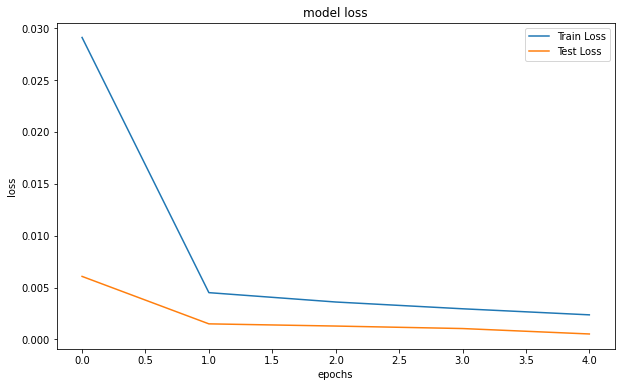

In [306]:
plt.figure(figsize=(10,6))
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [307]:
x_test=[]
for i in range(10,len(test)):
    x_test.append(test[i-10:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1170, 10, 1)

In [308]:
predictions = model2.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [309]:
y_test= dataset[training_data_len:]
from statsmodels.tools.eval_measures import rmse
pred_actual_rmse = rmse(predictions, y_test[10:])
print("rmse: ", pred_actual_rmse)

rmse:  [0.33824552]


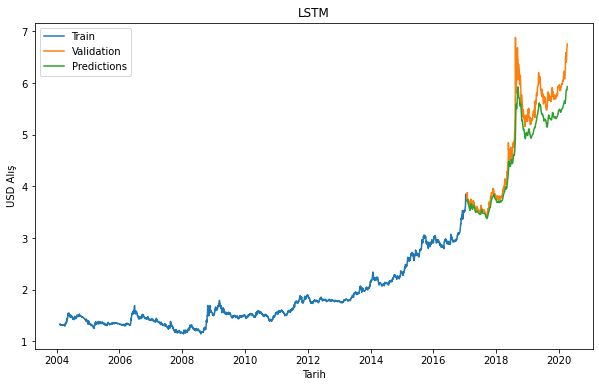

In [310]:
trainset = dataset[:training_data_len]
validset = dataset[training_data_len+10:]
validset['Predictions'] = predictions
plt.figure(figsize=(10,6))
plt.title('LSTM')
plt.xlabel('Tarih')
plt.ylabel('USD Alış')
plt.plot(trainset['USD_Alis'])
plt.plot(validset[['USD_Alis','Predictions']])
plt.legend(['Train','Validation','Predictions'])
plt.show()

In [311]:
validset

USD_Alis  Predictions
Tarih                            
2017-01-24  3.767800     3.720849
2017-01-25  3.752300     3.718650
2017-01-26  3.803400     3.715701
2017-01-27  3.834200     3.714814
2017-01-28  3.848767     3.718350
...              ...          ...
2020-04-03  6.667200     5.866180
2020-04-04  6.674900     5.874172
2020-04-05  6.682600     5.889552
2020-04-06  6.690300     5.910371
2020-04-07  6.754900     5.928730

[1170 rows x 2 columns]

### model 3

In [313]:
look_back = 15
train_data_gen = TimeseriesGenerator(train, train, length=look_back)
test_data_gen = TimeseriesGenerator(test, test, length=look_back)

In [314]:
model3 = Sequential()
model3.add(LSTM(50, input_shape=(look_back, 1)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
history3 = model3.fit_generator(train_data_gen, epochs=25)

Epoch 1/25
37/37 [==============================] - 2s 61ms/step - loss: 0.1009
Epoch 2/25
37/37 [==============================] - 2s 55ms/step - loss: 0.0022
Epoch 3/25
37/37 [==============================] - 2s 57ms/step - loss: 7.1828e-04
Epoch 4/25
37/37 [==============================] - 2s 56ms/step - loss: 4.5500e-04
Epoch 5/25
37/37 [==============================] - 2s 55ms/step - loss: 3.1334e-04
Epoch 6/25
37/37 [==============================] - 2s 56ms/step - loss: 2.4037e-04
Epoch 7/25
37/37 [==============================] - 2s 54ms/step - loss: 1.6615e-04
Epoch 8/25
37/37 [==============================] - 2s 60ms/step - loss: 1.4129e-04
Epoch 9/25
37/37 [==============================] - 2s 64ms/step - loss: 1.2367e-04
Epoch 10/25
37/37 [==============================] - 2s 54ms/step - loss: 1.1542e-04
Epoch 11/25
37/37 [==============================] - 2s 62ms/step - loss: 1.1726e-04
Epoch 12/25
37/37 [==============================] - 2s 56ms/step - loss: 1.1649e-

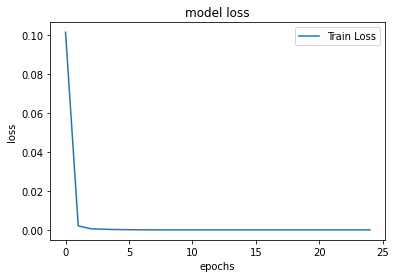

In [315]:
plt.plot(history3.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [316]:
model3.evaluate_generator(test_data_gen)
trainPredict = model3.predict_generator(train_data_gen)
testPredict = model3.predict_generator(test_data_gen)

In [318]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(train[look_back::,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test[look_back:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.20 RMSE


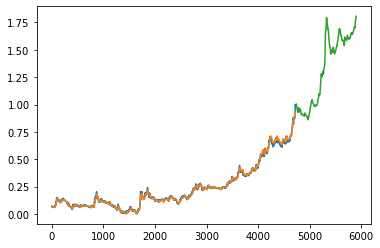

In [204]:
trainPredictPlot = np.empty_like(dff)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

trainPredictPlot = trainPredictPlot

testPredictPlot = np.empty_like(dff)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dff), :] = testPredict

testPredictPlot = testPredictPlot

plt.plot(train)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()